[1 : 영화 매출] [2 : 넷플리스 검색량] [3: cgv검색량] [4 : 코로나 검색량] [5 : 코로나 확진자 수]
[선택 완료시 q]
1
2
3
4
5
ㅂ
q


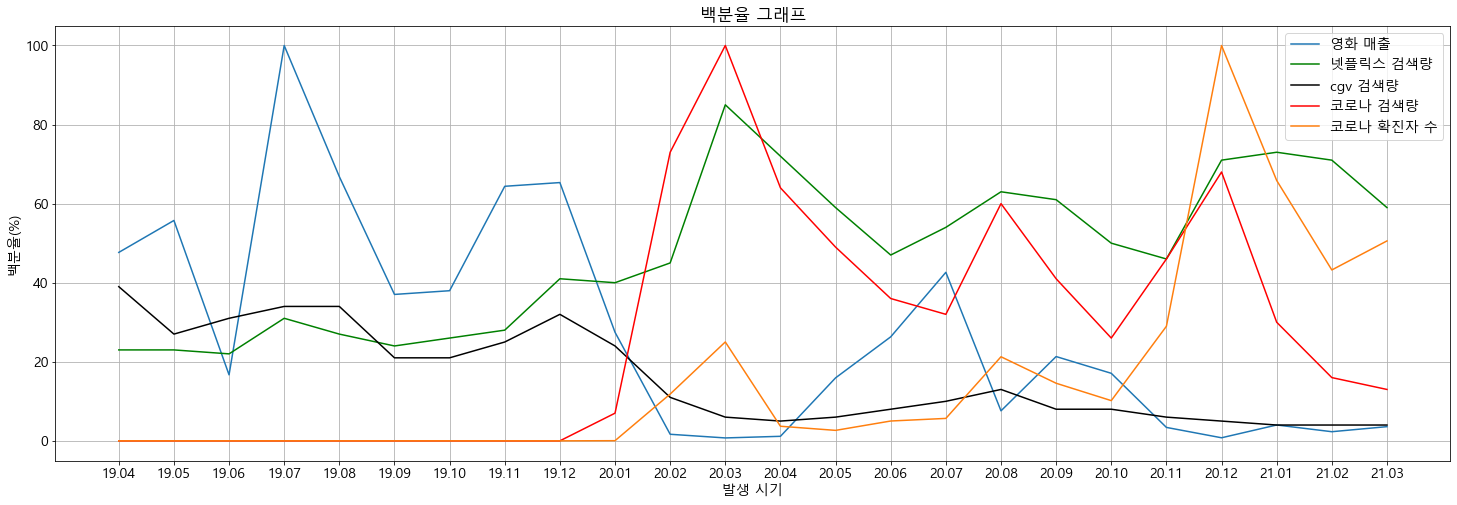

In [2]:
import csv
import matplotlib.pyplot as plt

corona_file = open('kr_daily.csv')
kakao_file = open('kakao1.csv')
s = open('Ko2019.csv',encoding = 'cp949')
d = open('Ko2020.csv',encoding = 'cp949')
f = open('Ko2021.csv',encoding = 'cp949')
data2019 = csv.reader(s)
data2020 = csv.reader(d)
data2021 = csv.reader(f)
kakao_data = csv.reader(kakao_file)
corona_data = csv.reader(corona_file)
corona_month=[]
corona_number=[] # 확진자 수
kakao_month=[]
kakao_netflix=[]
kakao_cgv=[]
kakao_corona=[]
month = []
score = []
index =0
temp1 = 0
temp2 = 0
max = 0
maxx = 0

for x in range(4) :
    next(data2019)
for x in range(6) :
    next(data2019)
    next(data2020)
    next(data2021)

next(corona_data)
next(kakao_data)

for item in kakao_data: #카카오 데이터 리스트화
    kakao_month.append(item[0][2:4]+'.'+item[0][5:7])
    kakao_netflix.append(int(item[1]))
    kakao_cgv.append(int(item[2]))
    kakao_corona.append(int(item[3]))

for item in range(9): #기간이 서로 다른 두 자료 간 기간을 통일
    # 2019-04 ~ 2019-12까지의 기간에 각각 0을 대입한다.
    corona_number.append(0)

for item in corona_data: #코로나 데이터 리스트화
    if item[0][2:4]+'.'+item[0][4:6] not in corona_month:
        # ex) 20.01이 없을 시
        temp2 = temp1
        corona_month.append(item[0][2:4]+'.'+item[0][4:6])
        #없을 시 item(20.01)를 corona_month에 삽입한다.
        corona_number.append(1)
    elif item[0][2:4]+'.'+item[0][4:6] in corona_month:
        # ex) 20.01이 있을 시
        
        index = corona_month.index(item[0][2:4]+'.'+item[0][4:6])
        # index 변수에 item의 위치를 대입한다.
        
        temp1 = int(item[1])
        # temp1(임시 변수)에 item의 1번째 요소를 int로 변화하여 대입
        
        corona_number[index+9]=(int(item[1])-temp2) /265.28 # max = 265.28
         

for i in data2019 :
    month.append(i[0][2:])
    score.append(int(i[3].replace(',',''))/1519598344.60)
    if maxx <=int(i[3].replace(',','')):
        maxx = int(i[3].replace(',',''))
month.pop()
score.pop()
for i in data2020 :
    month.append(i[0][2:])
    score.append(int(i[3].replace(',',''))/1519598344.60)
    if maxx <=int(i[3].replace(',','')):
        maxx = int(i[3].replace(',',''))
month.pop()
score.pop()
for i in data2021 :
    month.append(i[0][2:])
    score.append(int(i[3].replace(',',''))/1519598344.60)    
    if maxx <= int(i[3].replace(',','')):
        maxx = int(i[3].replace(',',''))
plt.figure(figsize = (25,8))
month.pop()
score.pop()

select = []
print('[1 : 영화 매출] [2 : 넷플리스 검색량] [3: cgv검색량] [4 : 코로나 검색량] [5 : 코로나 확진자 수]')
print('[선택 완료시 q]')
while True :
    sel = input()    
    if sel == 'q' :
        break
    select.append(sel)
plt.rcParams['font.family'] = 'Malgun Gothic'
for i in select :
    if i == '1' :
        plt.plot(kakao_month,score, label='영화 매출')
    if i == '2' :
        plt.plot(kakao_month,kakao_netflix,color='green', label='넷플릭스 검색량')
    if i == '3' :
        plt.plot(kakao_month,kakao_cgv,color='black', label='cgv 검색량')
    if i == '4' :
        plt.plot(kakao_month,kakao_corona,color='red', label='코로나 검색량')
    if i == '5' :
        plt.plot(kakao_month,corona_number, label='코로나 확진자 수')
else :
    plt.legend()

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize']=(20,8)
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.xlabel('발생 시기')
plt.ylabel('백분율(%)')
plt.title('백분율 그래프')

plt.grid(True)